
# Intro to Pandas, Data Manipulation and Visualization in Python
In this section, we will learn and practice how to read in data, conduct data manipulation and visualization in `Python`. In particular, we will be learning the `Pandas` package, which provides a fast and powerful interface to dataframes. 

## Pandas 
<img src="https://c402277.ssl.cf1.rackcdn.com/photos/13100/images/featured_story/BIC_128.png?1485963152" align="right">
`Pandas` is a library that provides high-performance, easy-to-use data structures and data analysis tools for `Python`.



Let's load the package `pandas` as well as `numpy`, and `matplotlib` for visualization later. The next few parameters set up the inline plotting to look nicely for the notebook. This is standard preamble for data processing in `ipython` notebooks that you can use in the future. There are some other variations such as giving `matplotlib` the `ggplot` theme from `R` if you wish (add `plt.style.use('ggplot')`). 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## Case Study
<img  width="200" height="40" src="https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Instacart_logo_and_wordmark.svg/1280px-Instacart_logo_and_wordmark.svg.png" align="left">
<br>
### Instacart orders


In this problem, we'll use the dataset from Instacart.com (https://www.instacart.com/datasets/grocery-shopping-2017), a grocery delivery service that connects customers with Personal Shoppers who pick up and deliver the groceries from local stores. The open data contains order, product, and aisles detailed information. We took a 5% sample of orders in this tutorial.



### Read in Data
Now let's read in a csv file for the dataset `orders.csv` and `orders_products.csv` using the `read_csv` function in pd. Index is very important in Pandas for reasons we will talk about later (subset, merge, ...). Let's specify the index when we read in the data with `index_col = ` parameter. 

To get a glimpse of the data, you can do:
* `.shape` to look at the dimension / size / shape of the dataframe,
* `.describe()` to see a summary of the data,
* `.head()` to view first 5 rows, or you can do it with `[:5]`.

In [2]:
orders = pd.read_csv('data/orders.csv', index_col='order_id');
print(orders.shape)
print(orders.describe())
orders.head()

(171054, 6)
             user_id   order_number      order_dow  order_hour_of_day  \
count  171054.000000  171054.000000  171054.000000      171054.000000   
mean   102612.564640      17.166719       2.772195          13.445701   
std     59637.539216      17.753241       2.046332           4.223096   
min         3.000000       1.000000       0.000000           0.000000   
25%     50569.000000       5.000000       1.000000          10.000000   
50%    102074.500000      11.000000       3.000000          13.000000   
75%    154204.000000      23.000000       5.000000          16.000000   
max    206208.000000     100.000000       6.000000          23.000000   

       days_since_prior_order  
count           160603.000000  
mean                11.112763  
std                  9.219712  
min                  0.000000  
25%                  4.000000  
50%                  7.000000  
75%                 15.000000  
max                 30.000000  


,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
1076138,39487,prior,3,5,21,21.0
1609528,198072,prior,31,0,14,11.0
2156935,100263,prior,40,3,16,6.0
2661897,154498,prior,6,5,15,1.0
1577308,187457,prior,8,6,21,19.0


In [3]:
orders_products = pd.read_csv('data/orders_products.csv', index_col='order_id');
orders_products.head()

,product_id,add_to_cart_order,reordered
order_id,,,
473,20082,1,1
473,24852,2,0
473,47144,3,1
473,36441,4,1
473,12206,5,0


### Data Indexing

After reading in the datasets and taking a look at the description or the first few rows, we are interested in some basic dataframe manipulations. 
* **Subset columns:** To select a column, we can:
    1. index with the name of the column as a string, 
    2. use the attribute operator . on the column name,
    3. use the `loc[:, ]` function on the column name,
    4. use the `iloc[:, ]` function on the column index (remember zero indexing in Python!)

In this example we take the `order_hour_of_day` column using each of the method.

In [4]:
print(orders['order_hour_of_day'].head())
print(orders.order_hour_of_day.head())
print(orders.loc[:, 'order_hour_of_day'].head())
print(orders.iloc[:, 4].head())

order_id
1076138    21
1609528    14
2156935    16
2661897    15
1577308    21
Name: order_hour_of_day, dtype: int64
order_id
1076138    21
1609528    14
2156935    16
2661897    15
1577308    21
Name: order_hour_of_day, dtype: int64
order_id
1076138    21
1609528    14
2156935    16
2661897    15
1577308    21
Name: order_hour_of_day, dtype: int64
order_id
1076138    21
1609528    14
2156935    16
2661897    15
1577308    21
Name: order_hour_of_day, dtype: int64


You can also select multiple columns by indexing the list of columns you would like to select:

In [5]:
orders[['order_dow', 'order_hour_of_day']].head()

,order_dow,order_hour_of_day
order_id,,
1076138,5,21
1609528,0,14
2156935,3,16
2661897,5,15
1577308,6,21


* **Subset rows**: You can subset the rows of a dataframe by 
    1. `iloc[]`: based on the row numbers
    2. `loc[]`: based on index value
    3. `[]` with a logical condition

Let's look at the following examples:

To get the first 5 rows, use `iloc`:

In [6]:
orders.iloc[range(5)]

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
1076138,39487,prior,3,5,21,21.0
1609528,198072,prior,31,0,14,11.0
2156935,100263,prior,40,3,16,6.0
2661897,154498,prior,6,5,15,1.0
1577308,187457,prior,8,6,21,19.0


To subset based on the index value, use the `loc` command:

In [7]:
orders.loc[[1076138,1609528]]

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
1076138,39487,prior,3,5,21,21.0
1609528,198072,prior,31,0,14,11.0


If we only want to look at the order hour of day being 6pm:

In [8]:
orders_18pm = orders[orders['order_hour_of_day'] == 18]
print(orders_18pm.shape)
orders_18pm[:5]

(9040, 6)


,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
2936202,178492,prior,15,1,18,5.0
834571,136721,prior,1,2,18,NaN
840261,157488,prior,3,6,18,7.0
3246776,174758,prior,33,4,18,6.0
2001934,147430,prior,1,6,18,NaN


Another example use case could be that if we want to only keep observations with non-NA values for `days_since_prior_order`, we can use the `isnull()` function which returns a boolean array for indexing:

In [9]:
orders_noNA = orders[~orders['days_since_prior_order'].isnull()];
orders_noNA.head()

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
1076138,39487,prior,3,5,21,21.0
1609528,198072,prior,31,0,14,11.0
2156935,100263,prior,40,3,16,6.0
2661897,154498,prior,6,5,15,1.0
1577308,187457,prior,8,6,21,19.0


## Exercise 1: Explore `aisles` and `products` data
Please read in the `aisles.csv` and `products.csv` files. Answer the following questions:
* How many distinct aisles are there?
* What's the name for aisle_id = 61? 
* How many products are there in aisle_id = 61?


In [10]:
aisles = pd.read_csv('data/aisles.csv', index_col='aisle_id');
print(aisles.shape)
print(aisles[['aisle']].drop_duplicates().shape)
print(aisles.loc[61])
aisles.head()

(134, 1)
(134, 1)
aisle    cookies cakes
Name: 61, dtype: object


,aisle
aisle_id,
1,prepared soups salads
2,specialty cheeses
3,energy granola bars
4,instant foods
5,marinades meat preparation


In [11]:
products = pd.read_csv('data/products.csv', index_col='product_id');
print(products[products['aisle_id'] == 61].shape)

(874, 3)


### Visualization

Let's try to look at the relationship between the day-of-the-week and the hour-of-day for all orders. We can tabulate them by using the `crosstab()` function:

In [12]:
orders_counts = pd.crosstab(orders['order_hour_of_day'], orders['order_dow'])
orders_counts

order_dow,0,1,2,3,4,5,6
order_hour_of_day,,,,,,,
0,208,206,152,136,130,156,167
1,122,101,76,76,72,78,87
2,73,60,45,41,41,46,63
3,39,32,36,42,27,39,50
4,50,43,35,29,39,49,45
5,64,89,68,62,58,92,48
6,177,277,227,228,229,241,156
7,612,812,672,625,650,661,603
8,1409,1697,1229,1141,1083,1231,1177


One interesting way to look at this data is to plot the distribution of hour-of-day by different day-of-the-week. A `Pandas` dataframe has some plot functions that can be called directly on it. For example, to do a line plot of the counts by each, 

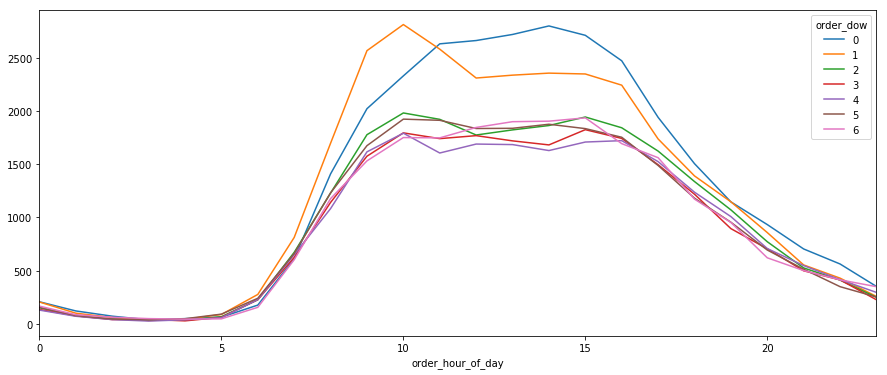

In [13]:
orders_counts.plot()

That's pretty good already, without us needing to supply any arguments to the plot function. Monday and Sundays seem to be the days with more orders placed than other days. It also seems like there is a little bump on Monday, at around 9 to 10am.

The lines for the other days seem to be overlapping and a bit hard to discern, so maybe it's a good idea to separate out the lines in multiple plots (think about the `facet` in `ggplot`). Try the following, which groups the counts by the two variables, count the sizes, and gives a plot separated by the first variable:

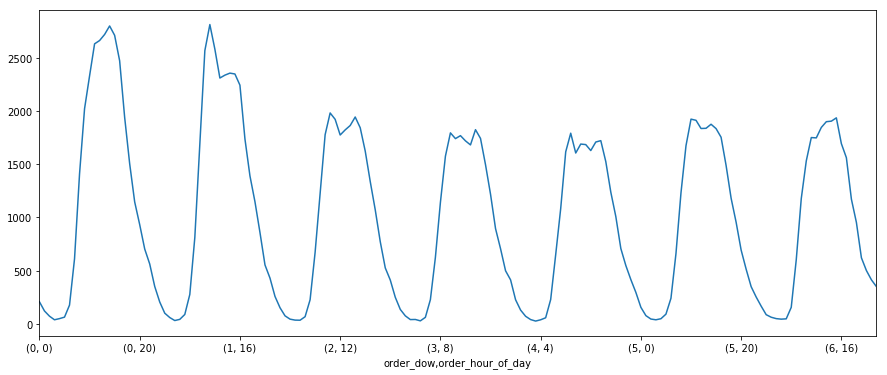

In [14]:
orders.groupby(['order_dow','order_hour_of_day']).size().plot()

This is useful, but the labels seem a bit off. To slightly improve on this, we can do a loop of subplots:

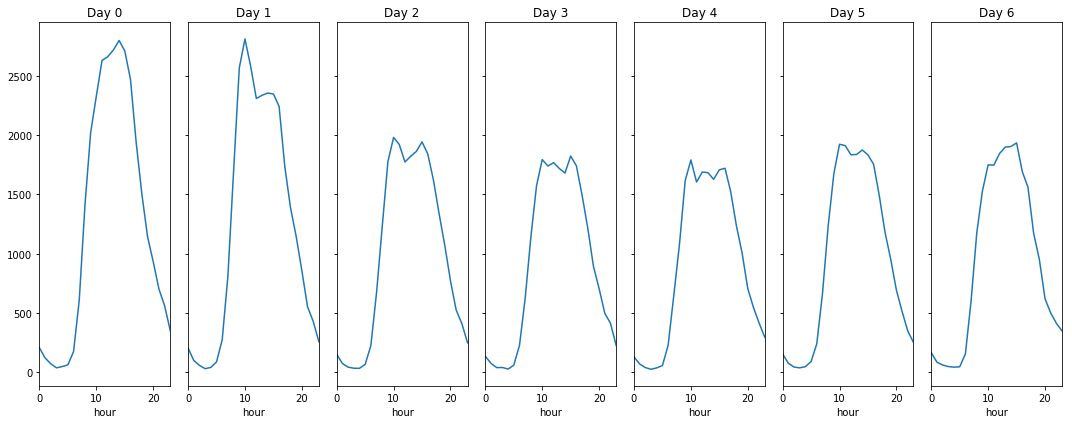

In [15]:
fig, axarr = plt.subplots(1,7, sharey=True)
for i in range(7):
    df = orders[orders['order_dow']==i].groupby('order_hour_of_day').size()
    df.index.name = 'hour'
    df.plot(ax=axarr[i], title='Day ' + str(i))

fig.tight_layout()

Another question that might be interesting is to look at the median, quantile, etc. of the hour of day. We can use a `boxplot()` function:

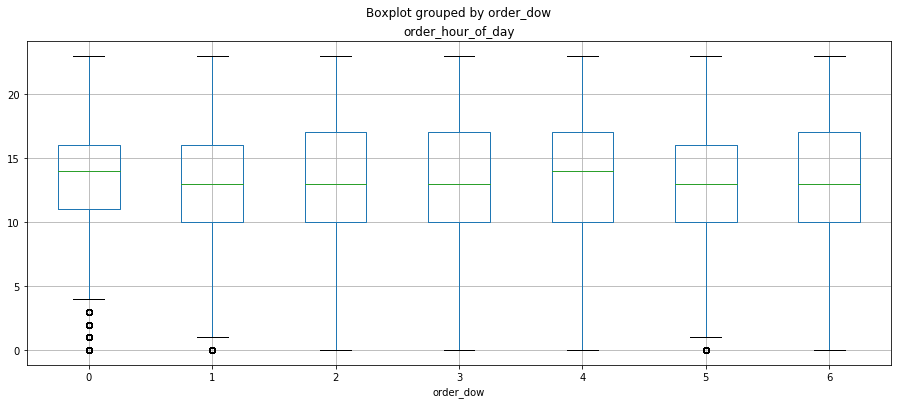

In [16]:
orders.boxplot(column='order_hour_of_day', by='order_dow')

Maybe a heatmap could also be useful? To make a heatmap, we can use the `pcolor()` function. We provide the data and the color mapping as arguments to the function:

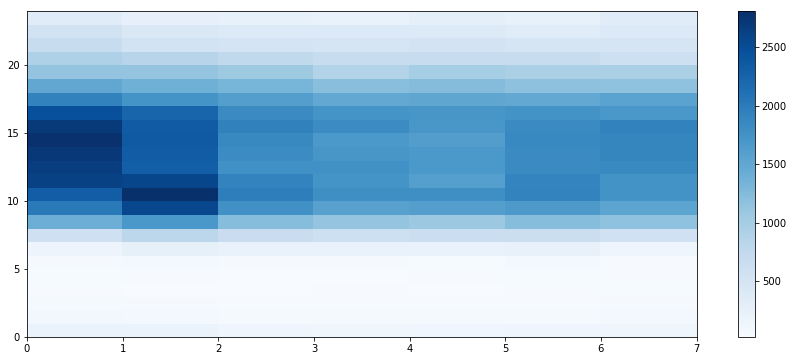

In [17]:
plt.pcolor(orders_counts, cmap=plt.cm.Blues)
plt.colorbar()

## Exercise 2: visualize the relationship between `days_since_prior_order` and `order_day_of_week`

We are interested in looking at the `days_since_prior_order` variable and the `order_day_of_week` variable for the orders that are placed between 9am to 5pm. 

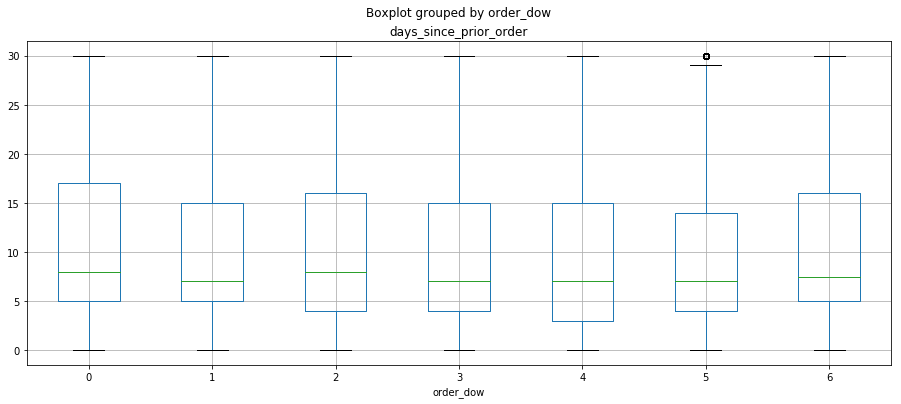

In [18]:
orders_sub = orders[(9 <= orders['order_hour_of_day']) & (orders['order_hour_of_day'] <= 17)]
orders_sub.boxplot(column='days_since_prior_order', by='order_dow')

## Group, Summarize, and Sort

Suppose we are intereted in knowing something on the individual user level. For example, what's the total number of orders each user had? We can use the `groupby` and `size`. For a single variable this achieves similar effect as `value_counts()` function on that column:

In [19]:
orders.groupby('user_id').size()[:5]

user_id
3     1
7     1
15    1
17    1
19    2
dtype: int64

In [20]:
orders['user_id'].value_counts().head()

154246    15
73042     13
60519     12
24659     12
146382    12
Name: user_id, dtype: int64

We can sort it further by the `sort_values()` function (and specifying `ascending = False` for decreasing order):

In [21]:
orders.groupby('user_id').size().sort_values(ascending = False)[:5]

user_id
154246    15
73042     13
60519     12
24659     12
146382    12
dtype: int64

More generally, you can use the `agg` for aggregating specific summary statistic. 
* You can supply a single type and it will be performed on all variables: for example, getting the mean of each variable on each user:

In [22]:
orders.groupby('user_id').agg('mean')[:5]

,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,
3,12.0,1.0,15.0,15.0
7,12.0,0.0,14.0,7.0
15,12.0,1.0,8.0,6.0
17,11.0,4.0,15.0,4.0
19,6.0,5.0,14.5,7.0


* or supply a dictionary that the specfic variable as key: here only summarizses the mean of the `order_hour_of_day`, and the maximum of the `days_since_prior_order`:

In [23]:
orders.groupby('user_id').agg({'order_hour_of_day': 'mean', 'days_since_prior_order': 'max'})[:5]

,order_hour_of_day,days_since_prior_order
user_id,,
3,15.0,15.0
7,14.0,7.0
15,8.0,6.0
17,15.0,4.0
19,14.5,8.0


## Exercise 3: Describing User Patterns

From the `orders_products` dataframe, answer the following questions: 
* Are there more products that are reordered, or never ordered again?
* Which `product_id` is the most frequently ordered? 
* What is that product called from the `products` dataframe?
* Is there a relationship between the order when a product is added to cart (`add_to_cart_order`), and whether a product is reordered? 
* What about the relationship between whether the product is reordered and the total number of items in the order?

In [24]:
orders_products['reordered'].value_counts()

1    42294
0    27764
Name: reordered, dtype: int64

In [25]:
orders_products.groupby('product_id').size().sort_values(ascending=False).head()

product_id
24852    987
13176    810
21137    565
21903    495
47626    416
dtype: int64

In [26]:
products.loc[24852]

product_name     Banana
aisle_id             24
department_id         4
Name: 24852, dtype: object

In [27]:
orders_products.groupby('reordered').agg({'add_to_cart_order': 'mean'})

,add_to_cart_order
reordered,
0,10.067497
1,7.796567


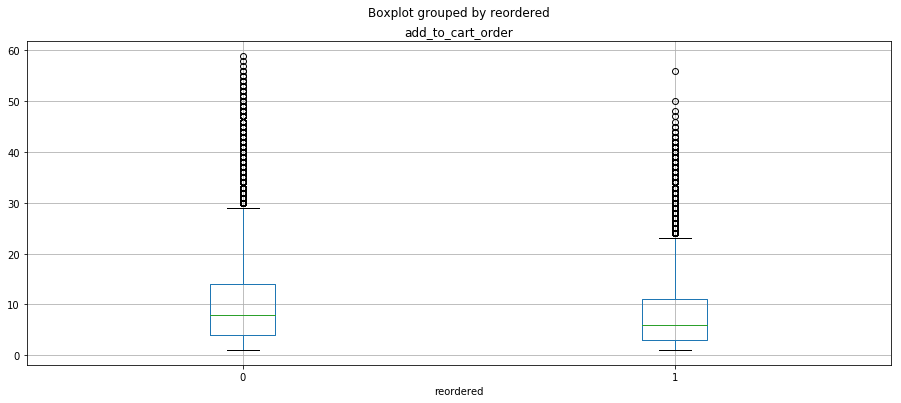

In [28]:
orders_products.boxplot(column='add_to_cart_order', by='reordered')

## Merge and Join

With many separate dataframes, it is often useful to join them to understand the relationship between variables and also to create additional features in predictions. Pandas provides high-performance, in memory join operations that are similar to relational databases such as SQL.

When the two dataframes are both indexed by the same variable that you want to join on, it is easy: use the `join` function on the left dataframe, and the right data frame is supplied as second argument.

If the current index is not the right variable, we can first reindex the data using the `set_index` command:
```python
orders_products=orders_products.set_index('order_id')
orders=orders.set_index('order_id')
```

In [29]:
orders_products_joined = orders_products.join(orders);
orders_products_joined.head()

,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,,,
473,20082,1,1,77529,train,7,6,10,8.0
473,24852,2,0,77529,train,7,6,10,8.0
473,47144,3,1,77529,train,7,6,10,8.0
473,36441,4,1,77529,train,7,6,10,8.0
473,12206,5,0,77529,train,7,6,10,8.0


When the two columns do not have the same index, we can use the more flexible `merge` function:
* the `left_on` and `right_on` options specify the column names to be joined on
* if the variable to be joined on is an index, set `left_index` / `right_index` to `True`. 
* Finally, the `how` option allows you to specify the type of joins (left, right, inner, outer).

In [30]:
order_products_desc = orders_products.merge(products, left_on='product_id', right_index=True, how='left')
order_products_desc.head()

,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
order_id,,,,,,
473,20082,1,1,Organic Whole Milk with DHA Omega-3,84,16
473,24852,2,0,Banana,24,4
473,47144,3,1,Unsweetened Original Almond Breeze Almond Milk,91,16
473,36441,4,1,Baby Wipes,56,18
473,12206,5,0,Basil Pesto,9,9


This way, we can look at the most popular products.

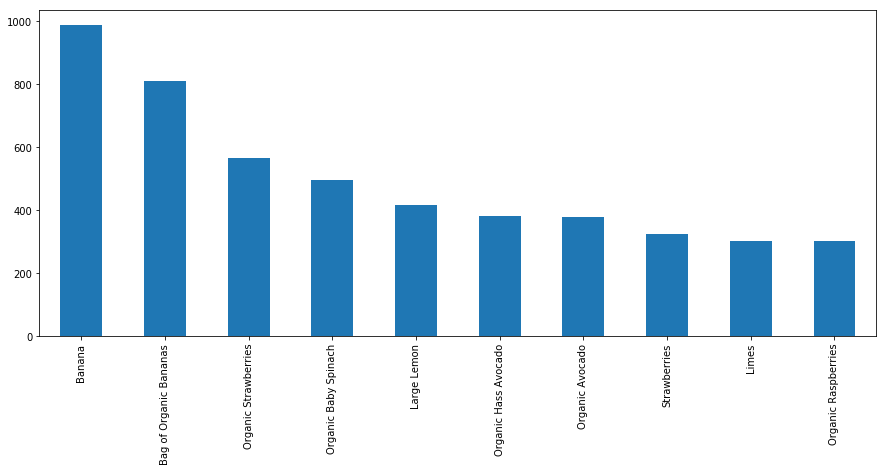

In [31]:
order_products_desc['product_name'].value_counts()[:10].plot(kind='bar')

## Exercise 4: Summarizing orders by aisle information

We are interested in knowing which aisles are *LEAST* popular and can make management decisions based on that. Try to answer the following questions:
* Which aisle has the least number of products ordered from?
* What about only among the reordered products?


**Challenge:** Suppose there was a software glitch that all products with the `add_to_cart_order` more than 30 was not correctly charged. What percent of all orders are affected by this glitch?

In [1]:
orders_products_aisles = orders_products.set_index('product_id').join(aisles)
orders_products_aisles.head()
orders_products.head()

NameError: name 'orders_products' is not defined

In [33]:
orders_products_aisles.groupby('aisle').size().sort_values()

aisle
beauty                            1
soft drinks                       1
skin care                         1
protein meal replacements         1
poultry counter                   1
packaged vegetables fruits        1
packaged produce                  1
milk                              1
lunch meat                        1
latino foods                      1
hot dogs bacon sausage            1
honeys syrups nectars             1
frozen juice                      1
frozen appetizers sides           1
water seltzer sparkling water     1
eye ear care                      1
butter                            1
breakfast bars pastries           1
first aid                         1
cereal                            1
cream                             1
digestion                         1
buns rolls                        1
dish detergents                   1
eggs                              1
ice cream ice                     2
grains rice dried goods           2
red wines             

In [34]:
orders_products_aisles[orders_products_aisles['reordered'] ==1].groupby('aisle').size().sort_values()

aisle
beauty                            1
soft drinks                       1
soap                              1
skin care                         1
red wines                         1
prepared soups salads             1
popcorn jerky                     1
packaged produce                  1
kitchen supplies                  1
honeys syrups nectars             1
grains rice dried goods           1
water seltzer sparkling water     1
eggs                              1
frozen juice                      1
buns rolls                        1
first aid                         1
butter                            1
cereal                            1
tea                               2
tortillas flat bread              2
breakfast bakery                  2
paper goods                       2
frozen pizza                      4
frozen produce                    4
hot cereal pancake mixes          4
packaged poultry                  5
nuts seeds dried fruit            7
frozen meat seafood   

## Reading data from SQL databases

(Note: The content for this section is adapted from the Pandas Cookbook Chapter 9.)

Pandas can read from HTML, JSON, SQL, Excel, HDF5, Stata, and a few other things. We'll talk about reading data from SQL databases now.

You can read data from a SQL database using the `pd.read_sql` function. `read_sql` will automatically convert SQL column names to DataFrame column names.

`read_sql` takes 2 arguments: a `SELECT` statement, and a database connection object. It means you can read from *any* kind of SQL database -- it doesn't matter if it's MySQL, SQLite, PostgreSQL, or something else.

In [36]:
import pandas as pd
import sqlite3

In [37]:
con = sqlite3.connect("data/weather_2012.sqlite")
df = pd.read_sql("SELECT * from weather_2012 LIMIT 5", con)
df

,id,date_time,temp
0,1,2012-01-01 00:00:00,-1.8
1,2,2012-01-01 01:00:00,-1.8
2,3,2012-01-01 02:00:00,-1.8
3,4,2012-01-01 03:00:00,-1.5
4,5,2012-01-01 04:00:00,-1.5


And that's it! If you are familiar with SQL type statements, you can try some advanced `SELECT` statements; otherwise, just select everything you need and do the data cleaning in Pandas. 

## Getting Data Ready for SciKitLearn 

Having a cleaned `Pandas` dataframe does not allow you to run through machine learning packages directly yet. The dataframe may need to be appropriately transformed (onehot encoded for categorical variables, scaled, etc.). Both Pandas and scikit-learn offer some useful preprocessing functions.

`pd.get_dummies` takes the dataframe, and a list of categorical columns to be converted into a dummified dataframe. See the following example, where we take the `orders_products_aisles` dataframe that we merged earlier, and convert the string categorical variable `aisle` to be onehot encoded:

In [38]:
X_dum = pd.get_dummies(orders_products_aisles.drop('reordered', axis=1) , columns=['aisle'])
X_dum.head()

,add_to_cart_order,aisle_beauty,aisle_body lotions soap,aisle_breakfast bakery,aisle_breakfast bars pastries,aisle_buns rolls,aisle_butter,aisle_candy chocolate,aisle_canned meat seafood,aisle_cereal,...,aisle_poultry counter,aisle_prepared soups salads,aisle_protein meal replacements,aisle_red wines,aisle_skin care,aisle_soap,aisle_soft drinks,aisle_tea,aisle_tortillas flat bread,aisle_water seltzer sparkling water
1,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,14,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,11,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can run it through sklearn, which will be the topic of tomorrow's lesson.

In [39]:
from sklearn import tree
Y = order_products_desc['reordered']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_dum, Y)
clf.predict_proba(X_dum)[:,1]

array([ 1.        ,  0.        ,  1.        , ...,  0.61235955,
        0.60710322,  0.58320127])

## Other useful references

* A useful cheatsheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* The mapping between `R` commands and `Pandas` can be found here, if you are coming from a more `R`-type background:
https://pandas.pydata.org/pandas-docs/version/0.18.1/comparison_with_r.html

<img src="http://www.rantchic.com/wp-content/uploads/2014/10/panda.jpg" align="left">